# Importing libraries and reading in Close Price data

In [ ]:
# Import libraries
import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import seaborn as sns
import plotly.express as px

In [6]:
# Read in Close price data
close_df = pd.read_csv('close_df.csv')
close_df.head()


Date  AGT  ARGT        BRF  BRZU  BZQ        ECH        EMB  EPU  \
0  2009-05-27  NaN   NaN  16.476213   NaN  NaN  35.236958  53.609131  NaN   
1  2009-05-28  NaN   NaN  16.840023   NaN  NaN  35.785748  53.580708  NaN   
2  2009-05-29  NaN   NaN  17.185333   NaN  NaN  36.236252  53.290588  NaN   
3  2009-06-01  NaN   NaN  17.727961   NaN  NaN  37.202759  53.893333  NaN   
4  2009-06-02  NaN   NaN  17.746462   NaN  NaN  37.063526  54.293674  NaN   

   ESEB  ...        XLE       XLF        XLI        XLK        XLP        XLU  \
0   NaN  ...  34.176460  5.890142  17.025055  14.234203  16.297838  16.762238   
1   NaN  ...  35.311043  6.056561  17.189442  14.440978  16.470680  17.109844   
2   NaN  ...  35.972301  6.167504  17.604301  14.598120  16.650732  17.232151   
3   NaN  ...  37.294807  6.233061  18.418367  15.011671  16.982014  17.785748   
4   NaN  ...  37.197357  6.132203  18.449684  14.978585  17.154863  17.573318   

         XLV        XLY      VFIAX  VSBSX  
0  20.466381  19.260120  64.907356    NaN  
1  20.571711  19.184195  65.921387    NaN  
2  20.928213  19.504778  66.817574    NaN  
3  21.065948  20.441204  68.539108    NaN  
4  21.195581  20.609932  68.680595    NaN  

[5 rows x 564 columns]

In [7]:
# sort index by date order
close_df = close_df.sort_index(ascending=True)
close_df.head()

Date  AGT  ARGT        BRF  BRZU  BZQ        ECH        EMB  EPU  \
0  2009-05-27  NaN   NaN  16.476213   NaN  NaN  35.236958  53.609131  NaN   
1  2009-05-28  NaN   NaN  16.840023   NaN  NaN  35.785748  53.580708  NaN   
2  2009-05-29  NaN   NaN  17.185333   NaN  NaN  36.236252  53.290588  NaN   
3  2009-06-01  NaN   NaN  17.727961   NaN  NaN  37.202759  53.893333  NaN   
4  2009-06-02  NaN   NaN  17.746462   NaN  NaN  37.063526  54.293674  NaN   

   ESEB  ...        XLE       XLF        XLI        XLK        XLP        XLU  \
0   NaN  ...  34.176460  5.890142  17.025055  14.234203  16.297838  16.762238   
1   NaN  ...  35.311043  6.056561  17.189442  14.440978  16.470680  17.109844   
2   NaN  ...  35.972301  6.167504  17.604301  14.598120  16.650732  17.232151   
3   NaN  ...  37.294807  6.233061  18.418367  15.011671  16.982014  17.785748   
4   NaN  ...  37.197357  6.132203  18.449684  14.978585  17.154863  17.573318   

         XLV        XLY      VFIAX  VSBSX  
0  20.466381  19.260120  64.907356    NaN  
1  20.571711  19.184195  65.921387    NaN  
2  20.928213  19.504778  66.817574    NaN  
3  21.065948  20.441204  68.539108    NaN  
4  21.195581  20.609932  68.680595    NaN  

[5 rows x 564 columns]

In [8]:
# Make date the reference:
close_df = close_df.set_index(close_df["Date"]).drop(columns=["Date"])
close_df.head()

AGT  ARGT        BRF  BRZU  BZQ        ECH        EMB  EPU  ESEB  \
Date                                                                           
2009-05-27  NaN   NaN  16.476213   NaN  NaN  35.236958  53.609131  NaN   NaN   
2009-05-28  NaN   NaN  16.840023   NaN  NaN  35.785748  53.580708  NaN   NaN   
2009-05-29  NaN   NaN  17.185333   NaN  NaN  36.236252  53.290588  NaN   NaN   
2009-06-01  NaN   NaN  17.727961   NaN  NaN  37.202759  53.893333  NaN   NaN   
2009-06-02  NaN   NaN  17.746462   NaN  NaN  37.063526  54.293674  NaN   NaN   

                  EWW  ...        XLE       XLF        XLI        XLK  \
Date                   ...                                              
2009-05-27  29.562580  ...  34.176460  5.890142  17.025055  14.234203   
2009-05-28  29.902758  ...  35.311043  6.056561  17.189442  14.440978   
2009-05-29  29.756962  ...  35.972301  6.167504  17.604301  14.598120   
2009-06-01  30.558807  ...  37.294807  6.233061  18.418367  15.011671   
2009-06-02  30.574997  ...  37.197357  6.132203  18.449684  14.978585   

                  XLP        XLU        XLV        XLY      VFIAX  VSBSX  
Date                                                                      
2009-05-27  16.297838  16.762238  20.466381  19.260120  64.907356    NaN  
2009-05-28  16.470680  17.109844  20.571711  19.184195  65.921387    NaN  
2009-05-29  16.650732  17.232151  20.928213  19.504778  66.817574    NaN  
2009-06-01  16.982014  17.785748  21.065948  20.441204  68.539108    NaN  
2009-06-02  17.154863  17.573318  21.195581  20.609932  68.680595    NaN  

[5 rows x 563 columns]

# Calculating daily returns

In [9]:
# compute daily returns
daily_returns_df = close_df.pct_change()

In [10]:
daily_returns_df.head()

AGT  ARGT       BRF  BRZU  BZQ       ECH       EMB  EPU  ESEB  \
Date                                                                        
2009-05-27  NaN   NaN       NaN   NaN  NaN       NaN       NaN  NaN   NaN   
2009-05-28  NaN   NaN  0.022081   NaN  NaN  0.015574 -0.000530  NaN   NaN   
2009-05-29  NaN   NaN  0.020505   NaN  NaN  0.012589 -0.005415  NaN   NaN   
2009-06-01  NaN   NaN  0.031575   NaN  NaN  0.026672  0.011311  NaN   NaN   
2009-06-02  NaN   NaN  0.001044   NaN  NaN -0.003743  0.007428  NaN   NaN   

                 EWW  ...       XLE       XLF       XLI       XLK       XLP  \
Date                  ...                                                     
2009-05-27       NaN  ...       NaN       NaN       NaN       NaN       NaN   
2009-05-28  0.011507  ...  0.033198  0.028254  0.009656  0.014527  0.010605   
2009-05-29 -0.004876  ...  0.018727  0.018318  0.024135  0.010882  0.010932   
2009-06-01  0.026946  ...  0.036765  0.010629  0.046242  0.028329  0.019896   
2009-06-02  0.000530  ... -0.002613 -0.016181  0.001700 -0.002204  0.010178   

                 XLU       XLV       XLY     VFIAX  VSBSX  
Date                                                       
2009-05-27       NaN       NaN       NaN       NaN    NaN  
2009-05-28  0.020737  0.005146 -0.003942  0.015623    NaN  
2009-05-29  0.007148  0.017330  0.016711  0.013595    NaN  
2009-06-01  0.032126  0.006581  0.048010  0.025765    NaN  
2009-06-02 -0.011944  0.006154  0.008254  0.002064    NaN  

[5 rows x 563 columns]

In [11]:
daily_returns_df.tail()

AGT      ARGT       BRF      BRZU       BZQ       ECH  \
Date                                                                     
2021-05-20  0.010609  0.012777  0.015794  0.008670 -0.008186  0.000705   
2021-05-21 -0.011776 -0.012948 -0.018214 -0.032366  0.034388  0.000000   
2021-05-24  0.003175  0.004036  0.013575  0.033811 -0.037234 -0.000705   
2021-05-25 -0.008244 -0.009715  0.000446 -0.025866  0.029696 -0.021509   
2021-05-26  0.012529  0.016005  0.011156  0.025022 -0.030181  0.007928   

                 EMB       EPU      ESEB       EWW  ...       XLE       XLF  \
Date                                                ...                       
2021-05-20  0.006960  0.004476  0.006399  0.015206  ... -0.001535  0.000538   
2021-05-21 -0.001975 -0.032086 -0.001613 -0.006033  ...  0.002113  0.009944   
2021-05-24  0.001079 -0.018416  0.002308 -0.002511  ...  0.009969  0.004790   
2021-05-25  0.004851 -0.013759  0.001934 -0.010491  ... -0.020311 -0.010063   
2021-05-26 -0.000089 -0.002854  0.001608  0.004665  ...  0.008913  0.002943   

                 XLI       XLK       XLP       XLU       XLV       XLY  \
Date                                                                     
2021-05-20  0.002248  0.019126  0.009238  0.008736  0.010483  0.010258   
2021-05-21  0.004876 -0.005477  0.000141  0.005166  0.000161 -0.005018   
2021-05-24  0.006211  0.017769  0.002957 -0.001814  0.000965  0.009908   
2021-05-25 -0.002990  0.000289  0.000281 -0.012114 -0.002972  0.003172   
2021-05-26  0.003192 -0.000072 -0.002105  0.000153 -0.005801  0.009546   

               VFIAX     VSBSX  
Date                            
2021-05-20  0.010642  0.000487  
2021-05-21 -0.000754  0.000000  
2021-05-24  0.010017  0.000000  
2021-05-25 -0.002112  0.000000  
2021-05-26  0.001885  0.000000  

[5 rows x 563 columns]

In [12]:
# Check for nulls in data:
#daily_returns_df.isnull().sum().describe()

In [13]:
# Drop nulls:
#daily_returns_df = daily_returns_df.dropna()

In [14]:
# Check drop nulls was successful:
daily_returns_df.isnull().sum().describe()

count     563.000000
mean      921.953819
std       966.422453
min         1.000000
25%         1.000000
50%       608.000000
75%      1724.000000
max      2984.000000
dtype: float64

In [15]:
daily_returns_df.head(10)

AGT  ARGT       BRF  BRZU  BZQ       ECH       EMB  EPU  ESEB  \
Date                                                                        
2009-05-27  NaN   NaN       NaN   NaN  NaN       NaN       NaN  NaN   NaN   
2009-05-28  NaN   NaN  0.022081   NaN  NaN  0.015574 -0.000530  NaN   NaN   
2009-05-29  NaN   NaN  0.020505   NaN  NaN  0.012589 -0.005415  NaN   NaN   
2009-06-01  NaN   NaN  0.031575   NaN  NaN  0.026672  0.011311  NaN   NaN   
2009-06-02  NaN   NaN  0.001044   NaN  NaN -0.003743  0.007428  NaN   NaN   
2009-06-03  NaN   NaN -0.048992   NaN  NaN -0.030055 -0.001264  NaN   NaN   
2009-06-04  NaN   NaN  0.033979   NaN  NaN  0.020278  0.001582  NaN   NaN   
2009-06-05  NaN   NaN -0.009187   NaN  NaN  0.004690 -0.001369  NaN   NaN   
2009-06-08  NaN   NaN -0.011769   NaN  NaN -0.002667 -0.009173  NaN   NaN   
2009-06-09  NaN   NaN  0.018044   NaN  NaN  0.004903  0.000213  NaN   NaN   

                 EWW  ...       XLE       XLF       XLI       XLK       XLP  \
Date                  ...                                                     
2009-05-27       NaN  ...       NaN       NaN       NaN       NaN       NaN   
2009-05-28  0.011507  ...  0.033198  0.028254  0.009656  0.014527  0.010605   
2009-05-29 -0.004876  ...  0.018727  0.018318  0.024135  0.010882  0.010932   
2009-06-01  0.026946  ...  0.036765  0.010629  0.046242  0.028329  0.019896   
2009-06-02  0.000530  ... -0.002613 -0.016181  0.001700 -0.002204  0.010178   
2009-06-03 -0.033642  ... -0.038548 -0.013158 -0.019516 -0.011043 -0.005038   
2009-06-04  0.015899  ...  0.022577  0.035833  0.018174  0.013958  0.001688   
2009-06-05  0.008365  ... -0.008184 -0.008850  0.008500  0.009912 -0.005055   
2009-06-08 -0.013915  ... -0.002303  0.007305  0.002528 -0.005998  0.003810   
2009-06-09 -0.001900  ...  0.009809  0.007252 -0.002102  0.004388 -0.008856   

                 XLU       XLV       XLY     VFIAX  VSBSX  
Date                                                       
2009-05-27       NaN       NaN       NaN       NaN    NaN  
2009-05-28  0.020737  0.005146 -0.003942  0.015623    NaN  
2009-05-29  0.007148  0.017330  0.016711  0.013595    NaN  
2009-06-01  0.032126  0.006581  0.048010  0.025765    NaN  
2009-06-02 -0.011944  0.006154  0.008254  0.002064    NaN  
2009-06-03 -0.016850 -0.002294 -0.013098 -0.013506    NaN  
2009-06-04  0.009315 -0.013793  0.002073  0.011603    NaN  
2009-06-05  0.001108  0.001942 -0.006208 -0.002409    NaN  
2009-06-08 -0.006269 -0.010857  0.009163 -0.000690    NaN  
2009-06-09 -0.002597 -0.005096  0.005778  0.003452    NaN  

[10 rows x 563 columns]

In [16]:
# Setting dataframe for 1 year timeframe
daily_returns_1yr = daily_returns_df.loc["2020-05-21":"2021-05-21"]
daily_returns_1yr

AGT      ARGT       BRF      BRZU       BZQ       ECH  \
Date                                                                     
2020-05-21  0.006370  0.008780  0.043544  0.086738 -0.082993 -0.004419   
2020-05-22  0.018724  0.018781 -0.006475 -0.014431  0.015208 -0.010492   
2020-05-26  0.003655  0.004047  0.076032  0.156724 -0.166971  0.001631   
2020-05-27 -0.000728  0.000896  0.045087  0.094233 -0.084649 -0.010586   
2020-05-28 -0.016348 -0.015660 -0.025757 -0.068266  0.057978 -0.011523   
2020-05-29 -0.006510 -0.008182  0.003966  0.021766 -0.012681 -0.005412   
2020-06-01  0.025679  0.023373  0.020408  0.023702 -0.023853  0.033906   
2020-06-02  0.036620  0.040305  0.060000  0.118113 -0.119361  0.034818   
2020-06-03  0.029363  0.031855  0.065125  0.090957 -0.087513  0.026213   
2020-06-04 -0.011488 -0.012516 -0.003429 -0.006487  0.004678  0.011819   
2020-06-05  0.024179  0.021124  0.034977  0.075937 -0.083818  0.058779   
2020-06-08  0.049668  0.050062  0.062604  0.114183 -0.108640  0.019217   
2020-06-09 -0.026842 -0.026793 -0.023983 -0.028445  0.027085 -0.010126   
2020-06-10 -0.000471  0.004049 -0.029914 -0.060527  0.064539 -0.014462   
2020-06-11 -0.065175 -0.066532 -0.090308 -0.160349  0.166232 -0.065140   
2020-06-12  0.044733  0.044492  0.044189  0.076073 -0.082728  0.021440   
2020-06-15 -0.007013 -0.004549 -0.020290 -0.033268  0.032907 -0.009704   
2020-06-16  0.014223  0.009971 -0.011834 -0.010375  0.013569  0.012731   
2020-06-17 -0.014456 -0.011518  0.020359  0.032217 -0.033178 -0.004190   
2020-06-18 -0.027825 -0.032460 -0.015258 -0.027991  0.029500 -0.024101   
2020-06-19  0.025514  0.027527  0.020262  0.022044 -0.020468  0.001176   
2020-06-22 -0.007087 -0.004186  0.006425 -0.003366  0.000597  0.002741   
2020-06-23  0.014571  0.013451  0.027278  0.056401 -0.058473  0.001952   
2020-06-24 -0.017128 -0.018665 -0.049718 -0.096932  0.097592  0.002728   
2020-06-25  0.029521  0.026627  0.007135  0.040169 -0.041570  0.016712   
2020-06-26 -0.021386 -0.016879 -0.047226 -0.096733  0.097590 -0.024082   
2020-06-29  0.012886  0.010050  0.027881  0.052145 -0.055982  0.019193   
2020-06-30 -0.010642 -0.007877  0.006028 -0.009059  0.014535 -0.031514   
2020-07-01  0.010268  0.003761  0.035950  0.059962 -0.064757  0.026587   
2020-07-02  0.002178  0.004996 -0.008676 -0.014967  0.018995  0.054890   
...              ...       ...       ...       ...       ...       ...   
2021-04-12 -0.009512 -0.007680 -0.013347 -0.004255  0.005342 -0.005424   
2021-04-13  0.004880  0.004038  0.001503  0.008765 -0.009564 -0.001435   
2021-04-14 -0.005836 -0.007708  0.007504  0.038340 -0.039700 -0.001725   
2021-04-15  0.016979  0.018237  0.016385  0.022071 -0.023464  0.017564   
2021-04-16  0.007360  0.008624  0.012213  0.019957 -0.019451  0.009621   
2021-04-19 -0.006460 -0.009536  0.006757  0.010737 -0.010502  0.003363   
2021-04-20 -0.009444 -0.006308 -0.007191 -0.014891  0.014151 -0.007821   
2021-04-21  0.014535  0.011360  0.008209  0.007054 -0.004651 -0.002252   
2021-04-22 -0.012902 -0.011563  0.007663  0.016011 -0.017523 -0.028217   
2021-04-23  0.005853  0.005348  0.000475  0.007978 -0.007134 -0.004646   
2021-04-26  0.010473  0.013298  0.014252  0.015439 -0.015569  0.014002   
2021-04-27  0.006833  0.004593 -0.007494 -0.020400  0.020681 -0.024453   
2021-04-28  0.001487 -0.000653  0.016989  0.064833 -0.066746 -0.026836   
2021-04-29 -0.011650 -0.010458  0.006497 -0.003229  0.001277 -0.025455   
2021-04-30 -0.013597 -0.012550 -0.023513 -0.054327  0.056122 -0.008085   
2021-05-03 -0.003436 -0.002007  0.006610  0.007927 -0.007246  0.029467   
2021-05-04 -0.015243 -0.018432 -0.010319 -0.025828  0.024331  0.010353   
2021-05-05  0.006605  0.007852  0.028436  0.055417 -0.057007  0.012960   
2021-05-06 -0.005851 -0.006098  0.013825  0.042969 -0.041562 -0.009223   
2021-05-07  0.024971  0.024881  0.027273  0.053604 -0.053877 -0.000601   
2021-05-10 -0.015013 -0.018291 -0.005752 -0.004039  0.005556 -0.009916   
2021-05-11 -0.005356 

In [17]:
# Setting dataframe for 3 year timeframe
daily_returns_3yr = daily_returns_df.loc["2018-05-21":"2021-05-21"]
daily_returns_3yr

AGT      ARGT       BRF      BRZU       BZQ       ECH  \
Date                                                                     
2018-05-21  0.002226  0.000951  0.016056  0.005534 -0.002128 -0.003678   
2018-05-22 -0.003332 -0.005385  0.034568  0.076724 -0.047975  0.012823   
2018-05-23 -0.005684 -0.001911 -0.011456 -0.049609  0.031355  0.003069   
2018-05-24 -0.002130 -0.001914 -0.008691 -0.043657  0.028665 -0.018933   
2018-05-25  0.000000 -0.003517 -0.012664 -0.070791  0.046443  0.001365   
2018-05-29 -0.043429 -0.042028 -0.052787 -0.153791  0.105306 -0.023555   
2018-05-30  0.002348  0.008707  0.014062  0.016407 -0.019164  0.001595   
2018-05-31 -0.008591 -0.010292  0.001541  0.007450  0.002419 -0.006569   
2018-06-01  0.005908  0.001006  0.014872  0.014790 -0.010024  0.001403   
2018-06-04  0.016053  0.021783  0.019707  0.049798 -0.033565  0.017807   
2018-06-05  0.026590  0.020006 -0.034192 -0.112611  0.075475 -0.014350   
2018-06-06  0.002065  0.003537 -0.021036 -0.047371  0.031571  0.003391   
2018-06-07 -0.029406 -0.024672 -0.055032 -0.153741  0.103708 -0.011528   
2018-06-08  0.015824  0.013798  0.057682  0.127224 -0.087308  0.011462   
2018-06-11  0.007219  0.004537 -0.009439 -0.028216  0.019097 -0.003380   
2018-06-12 -0.006790 -0.005806  0.000529  0.030020 -0.018739 -0.002394   
2018-06-13 -0.015572 -0.024010 -0.000529 -0.028667  0.016146 -0.001000   
2018-06-14 -0.025463 -0.021277 -0.032822 -0.100344  0.069537 -0.002602   
2018-06-15 -0.017458 -0.010870  0.011494  0.028978 -0.019169 -0.001003   
2018-06-18 -0.037028 -0.036401 -0.010281 -0.039320  0.019870 -0.011651   
2018-06-19  0.011141  0.011404  0.013122  0.056416 -0.035132 -0.013049   
2018-06-20  0.003756  0.003876 -0.004317 -0.011518  0.003807  0.000000   
2018-06-21  0.026196  0.016497 -0.009756 -0.063030  0.046661 -0.010703   
2018-06-22  0.007091  0.005870 -0.000547  0.018089 -0.011185  0.001909   
2018-06-25 -0.035607 -0.028150  0.007119  0.021100 -0.015453 -0.008893   
2018-06-26 -0.001251 -0.001413 -0.006525 -0.015770  0.009871 -0.007691   
2018-06-27 -0.042189 -0.044217 -0.027367 -0.099448  0.069540 -0.007966   
2018-06-28  0.015656  0.012213  0.002814  0.073620 -0.054532 -0.006944   
2018-06-29 -0.017991 -0.013894  0.005612  0.017143 -0.010300  0.006119   
2018-07-02 -0.014867 -0.014831 -0.011719 -0.017416  0.010727 -0.007168   
...              ...       ...       ...       ...       ...       ...   
2021-04-12 -0.009512 -0.007680 -0.013347 -0.004255  0.005342 -0.005424   
2021-04-13  0.004880  0.004038  0.001503  0.008765 -0.009564 -0.001435   
2021-04-14 -0.005836 -0.007708  0.007504  0.038340 -0.039700 -0.001725   
2021-04-15  0.016979  0.018237  0.016385  0.022071 -0.023464  0.017564   
2021-04-16  0.007360  0.008624  0.012213  0.019957 -0.019451  0.009621   
2021-04-19 -0.006460 -0.009536  0.006757  0.010737 -0.010502  0.003363   
2021-04-20 -0.009444 -0.006308 -0.007191 -0.014891  0.014151 -0.007821   
2021-04-21  0.014535  0.011360  0.008209  0.007054 -0.004651 -0.002252   
2021-04-22 -0.012902 -0.011563  0.007663  0.016011 -0.017523 -0.028217   
2021-04-23  0.005853  0.005348  0.000475  0.007978 -0.007134 -0.004646   
2021-04-26  0.010473  0.013298  0.014252  0.015439 -0.015569  0.014002   
2021-04-27  0.006833  0.004593 -0.007494 -0.020400  0.020681 -0.024453   
2021-04-28  0.001487 -0.000653  0.016989  0.064833 -0.066746 -0.026836   
2021-04-29 -0.011650 -0.010458  0.006497 -0.003229  0.001277 -0.025455   
2021-04-30 -0.013597 -0.012550 -0.023513 -0.054327  0.056122 -0.008085   
2021-05-03 -0.003436 -0.002007  0.006610  0.007927 -0.007246  0.029467   
2021-05-04 -0.015243 -0.018432 -0.010319 -0.025828  0.024331  0.010353   
2021-05-05  0.006605  0.007852  0.028436  0.055417 -0.057007  0.012960   
2021-05-06 -0.005851 -0.006098  0.013825  0.042969 -0.041562 -0.009223   
2021-05-07  0.024971  0.024881  0.027273  0.053604 -0.053877 -0.000601   
2021-05-10 -0.015013 -0.018291 -0.005752 -0.004039  0.005556 -0.009916   
2021-05-11 -0.005356 

In [18]:
# Setting dataframe for 5 year timeframe
daily_returns_5yr = daily_returns_df.loc["2016-05-21":"2021-05-21"]
daily_returns_5yr

AGT      ARGT       BRF      BRZU       BZQ       ECH  \
Date                                                                     
2016-05-23       NaN  0.000979 -0.032583 -0.088921  0.065260 -0.001983   
2016-05-24       NaN  0.004403  0.006415  0.019291 -0.015902 -0.001420   
2016-05-25       NaN  0.006332  0.004781 -0.014861  0.009272  0.007675   
2016-05-26       NaN  0.008713  0.009516  0.023338 -0.017848  0.007898   
2016-05-27       NaN  0.001919 -0.016496 -0.058823  0.040620 -0.001399   
2016-05-31       NaN -0.003831 -0.010383 -0.041519  0.027992 -0.013453   
2016-06-01       NaN -0.001923  0.020178  0.050409 -0.033725 -0.001989   
2016-06-02       NaN  0.013969  0.007120  0.063105 -0.043950  0.003700   
2016-06-03       NaN  0.008076  0.022781  0.090143 -0.063818  0.021554   
2016-06-06       NaN  0.016494  0.013825  0.010637 -0.003755  0.017213   
2016-06-07       NaN  0.026426  0.012879  0.032828 -0.023775  0.006277   
2016-06-08       NaN  0.004517  0.046373  0.148490 -0.098307  0.008408   
2016-06-09       NaN -0.007644 -0.012866 -0.052287  0.035573 -0.012910   
2016-06-10       NaN -0.018124 -0.029689 -0.132969  0.086514 -0.017983   
2016-06-13       NaN -0.011537 -0.023134 -0.025710  0.020199 -0.013874   
2016-06-14       NaN  0.002801 -0.016807 -0.063861  0.040746 -0.001407   
2016-06-15       NaN  0.010242  0.013209  0.032417 -0.020954  0.007890   
2016-06-16       NaN -0.003687  0.007669  0.034676 -0.022811  0.000839   
2016-06-17       NaN  0.015726  0.015982  0.047500 -0.032853  0.008380   
2016-06-20       NaN  0.010929  0.026966  0.076206 -0.047378  0.013574   
2016-06-21       NaN -0.008108  0.002918  0.013928 -0.012825  0.008745   
2016-06-22       NaN  0.004995  0.013091 -0.014429  0.006020  0.000166   
2016-06-23       NaN  0.009489  0.034458  0.119700 -0.076220  0.018764   
2016-06-24       NaN -0.047001 -0.039556 -0.127197  0.082509 -0.050921   
2016-06-27       NaN -0.026304 -0.010838 -0.051294  0.033386 -0.018550   
2016-06-28       NaN  0.033285  0.040175  0.128853 -0.085340  0.042745   
2016-06-29       NaN  0.029412  0.038624  0.121643 -0.080306  0.019241   
2016-06-30       NaN  0.011338  0.014199  0.048488 -0.035507  0.006840   
2016-07-01       NaN  0.005830  0.005333  0.037206 -0.022164  0.009239   
2016-07-05       NaN -0.004013 -0.015915 -0.094954  0.063772 -0.008616   
...              ...       ...       ...       ...       ...       ...   
2021-04-12 -0.009512 -0.007680 -0.013347 -0.004255  0.005342 -0.005424   
2021-04-13  0.004880  0.004038  0.001503  0.008765 -0.009564 -0.001435   
2021-04-14 -0.005836 -0.007708  0.007504  0.038340 -0.039700 -0.001725   
2021-04-15  0.016979  0.018237  0.016385  0.022071 -0.023464  0.017564   
2021-04-16  0.007360  0.008624  0.012213  0.019957 -0.019451  0.009621   
2021-04-19 -0.006460 -0.009536  0.006757  0.010737 -0.010502  0.003363   
2021-04-20 -0.009444 -0.006308 -0.007191 -0.014891  0.014151 -0.007821   
2021-04-21  0.014535  0.011360  0.008209  0.007054 -0.004651 -0.002252   
2021-04-22 -0.012902 -0.011563  0.007663  0.016011 -0.017523 -0.028217   
2021-04-23  0.005853  0.005348  0.000475  0.007978 -0.007134 -0.004646   
2021-04-26  0.010473  0.013298  0.014252  0.015439 -0.015569  0.014002   
2021-04-27  0.006833  0.004593 -0.007494 -0.020400  0.020681 -0.024453   
2021-04-28  0.001487 -0.000653  0.016989  0.064833 -0.066746 -0.026836   
2021-04-29 -0.011650 -0.010458  0.006497 -0.003229  0.001277 -0.025455   
2021-04-30 -0.013597 -0.012550 -0.023513 -0.054327  0.056122 -0.008085   
2021-05-03 -0.003436 -0.002007  0.006610  0.007927 -0.007246  0.029467   
2021-05-04 -0.015243 -0.018432 -0.010319 -0.025828  0.024331  0.010353   
2021-05-05  0.006605  0.007852  0.028436  0.055417 -0.057007  0.012960   
2021-05-06 -0.005851 -0.006098  0.013825  0.042969 -0.041562 -0.009223   
2021-05-07  0.024971  0.024881  0.027273  0.053604 -0.053877 -0.000601   
2021-05-10 -0.015013 -0.018291 -0.005752 -0.004039  0.005556 -0.009916   
2021-05-11 -0.005356 

In [19]:
# Setting dataframe for 10 year timeframe
daily_returns_10yr = daily_returns_df.loc["2011-05-21":"2021-05-21"]
daily_returns_10yr

AGT      ARGT       BRF      BRZU       BZQ       ECH  \
Date                                                                     
2011-05-23       NaN -0.018219 -0.020697       NaN  0.024287 -0.015560   
2011-05-24       NaN  0.000000  0.014275       NaN -0.036159 -0.003320   
2011-05-25       NaN  0.003436  0.003107       NaN  0.004920  0.004531   
2011-05-26       NaN  0.000000  0.016946       NaN -0.036720  0.016184   
2011-05-27       NaN  0.000000  0.015409       NaN -0.027954  0.000653   
2011-05-31       NaN  0.010959  0.025410       NaN -0.020261  0.004566   
2011-06-01       NaN -0.018293 -0.018241       NaN  0.043362 -0.008831   
2011-06-02       NaN  0.002760  0.005609       NaN -0.028772  0.010613   
2011-06-03       NaN -0.002065  0.010458       NaN -0.007242 -0.001685   
2011-06-06       NaN -0.013793 -0.020528       NaN  0.048408 -0.015974   
2011-06-07       NaN  0.002797  0.016907       NaN -0.006958  0.003828   
2011-06-08       NaN -0.016039 -0.005196       NaN  0.009554 -0.003418   
2011-06-09       NaN  0.016301 -0.000174       NaN -0.011357 -0.007915   
2011-06-10       NaN -0.008368 -0.009751       NaN  0.033823 -0.010240   
2011-06-13       NaN -0.007736  0.004044       NaN  0.007407 -0.017600   
2011-06-14       NaN  0.019844  0.000000       NaN -0.020833 -0.001505   
2011-06-15       NaN -0.013204 -0.022767       NaN  0.031915 -0.018627   
2011-06-16       NaN -0.017606 -0.003584       NaN  0.024864 -0.009351   
2011-06-17       NaN  0.019355  0.000899       NaN -0.011834  0.011834   
2011-06-20       NaN  0.009845 -0.003594       NaN -0.008982  0.000696   
2011-06-21       NaN  0.016713  0.010279       NaN -0.010876  0.021288   
2011-06-22       NaN -0.006164 -0.006069       NaN -0.003054 -0.001725   
2011-06-23       NaN -0.004824 -0.005029       NaN  0.023897 -0.007604   
2011-06-24       NaN  0.000000 -0.007401       NaN  0.007181 -0.003204   
2011-06-27       NaN  0.002770  0.007456       NaN -0.022579  0.013837   
2011-06-28       NaN  0.010359  0.016787       NaN -0.053495  0.015302   
2011-06-29       NaN  0.009570 -0.002840       NaN -0.016057  0.011541   
2011-06-30       NaN  0.009479  0.010148       NaN -0.012402  0.011677   
2011-07-01       NaN  0.010060  0.014804       NaN -0.023133  0.004511   
2011-07-05       NaN  0.005312 -0.010073       NaN  0.007442 -0.002510   
...              ...       ...       ...       ...       ...       ...   
2021-04-12 -0.009512 -0.007680 -0.013347 -0.004255  0.005342 -0.005424   
2021-04-13  0.004880  0.004038  0.001503  0.008765 -0.009564 -0.001435   
2021-04-14 -0.005836 -0.007708  0.007504  0.038340 -0.039700 -0.001725   
2021-04-15  0.016979  0.018237  0.016385  0.022071 -0.023464  0.017564   
2021-04-16  0.007360  0.008624  0.012213  0.019957 -0.019451  0.009621   
2021-04-19 -0.006460 -0.009536  0.006757  0.010737 -0.010502  0.003363   
2021-04-20 -0.009444 -0.006308 -0.007191 -0.014891  0.014151 -0.007821   
2021-04-21  0.014535  0.011360  0.008209  0.007054 -0.004651 -0.002252   
2021-04-22 -0.012902 -0.011563  0.007663  0.016011 -0.017523 -0.028217   
2021-04-23  0.005853  0.005348  0.000475  0.007978 -0.007134 -0.004646   
2021-04-26  0.010473  0.013298  0.014252  0.015439 -0.015569  0.014002   
2021-04-27  0.006833  0.004593 -0.007494 -0.020400  0.020681 -0.024453   
2021-04-28  0.001487 -0.000653  0.016989  0.064833 -0.066746 -0.026836   
2021-04-29 -0.011650 -0.010458  0.006497 -0.003229  0.001277 -0.025455   
2021-04-30 -0.013597 -0.012550 -0.023513 -0.054327  0.056122 -0.008085   
2021-05-03 -0.003436 -0.002007  0.006610  0.007927 -0.007246  0.029467   
2021-05-04 -0.015243 -0.018432 -0.010319 -0.025828  0.024331  0.010353   
2021-05-05  0.006605  0.007852  0.028436  0.055417 -0.057007  0.012960   
2021-05-06 -0.005851 -0.006098  0.013825  0.042969 -0.041562 -0.009223   
2021-05-07  0.024971  0.024881  0.027273  0.053604 -0.053877 -0.000601   
2021-05-10 -0.015013 -0.018291 -0.005752 -0.004039  0.005556 -0.009916   
2021-05-11 -0.005356 

# Extracting top 20 ETFs with highest cumulative returns over 1, 3, 5 and 10 year timeframes

In [20]:
# Calculate cumulative returns over 1, 3, 5 and 10 years
cum_returns_1yr = (1 + daily_returns_1yr).cumprod() - 1
cum_returns_3yr = (1 + daily_returns_3yr).cumprod() - 1
cum_returns_5yr = (1 + daily_returns_5yr).cumprod() - 1
cum_returns_10yr = (1 + daily_returns_10yr).cumprod() - 1

In [21]:
# Obtain top 20 ETFs with highest cumulative returns over 1 year timeframe:
# getting 1 yr cumulative return row
perc_cum_returns_1yr = cum_returns_1yr.tail(1)
# sorting in descending order the 1 yr cumulative return row
perc_cum_returns_1yr = perc_cum_returns_1yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_1yr = perc_cum_returns_1yr.head(20)

In [22]:
# List of top 20 ETFs with highest cumulative returns over 1 year timeframe:
top10_cum_returns_1yr

Date  2021-05-21
KORU    3.069174
SOXL    2.363999
MEXX    2.190078
INDL    2.048125
COPX    1.647186
SLX     1.569163
EDC     1.550564
REMX    1.396270
TQQQ    1.381481
LIT     1.335037
TAN     1.324322
LBJ     1.231500
KGRN    1.181367
BRZU    1.151353
UBR     1.150318
PICK    1.093418
CHAU    1.087820
PBD     1.079847
SMIN    1.073048
YOLO    1.028949

In [23]:
# Obtain top 20 ETFs with highest cumulative returns over 3 year timeframe:
# getting 3 yr cumulative return row
perc_cum_returns_3yr = cum_returns_3yr.tail(1)
# sorting in descending order the 3 yr cumulative return row
perc_cum_returns_3yr = perc_cum_returns_3yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_3yr = perc_cum_returns_3yr.head(20)

In [24]:
# List of top 20 ETFs with highest cumulative returns over 3 year timeframe:
top10_cum_returns_3yr

Date  2021-05-21
TQQQ    2.616671
SOXL    2.401739
TAN     1.989584
ARKK    1.613783
ICLN    1.397785
ARKF    1.378238
ARKQ    1.377689
SMH     1.373055
PBD     1.325907
CHIS    1.309456
ESPO    1.240702
ONLN    1.215188
KOMP    1.173957
EBIZ    1.134071
CHIH    1.111552
VGT     1.095884
XLK     1.057435
CHIK    1.023469
OGIG    1.003960
QQQ     0.996081

In [25]:
# Obtain top 20 ETFs with highest cumulative returns over 5 year timeframe:
# getting 5 yr cumulative return row
perc_cum_returns_5yr = cum_returns_5yr.tail(1)
# sorting in descending order the 5 yr cumulative return row
perc_cum_returns_5yr = perc_cum_returns_5yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_5yr = perc_cum_returns_5yr.head(20)

In [26]:
# List of top 20 ETFs with highest cumulative returns over 5 year timeframe:
top10_cum_returns_5yr

Date  2021-05-21
SOXL   20.622707
TQQQ   11.327743
ARKK    5.199927
SMH     3.684570
ARKQ    3.496060
TAN     2.946137
VGT     2.658658
SOCL    2.496975
XLK     2.422751
CHIQ    2.214822
QQQ     2.199123
CXSE    2.072174
PNQI    2.058867
PBD     1.994036
COPX    1.957892
ONEQ    1.956461
LIT     1.952295
ICLN    1.950012
SLX     1.928866
PICK    1.892282

In [27]:
# Obtain top 20 ETFs with highest cumulative returns over 10 year timeframe:
# getting 10 yr cumulative return row
perc_cum_returns_10yr = cum_returns_10yr.tail(1)
# sorting in descending order the 10 yr cumulative return row
perc_cum_returns_10yr = perc_cum_returns_10yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_10yr = perc_cum_returns_10yr.head(20)

In [28]:
# List of top 20 ETFs with highest cumulative returns over 10 year timeframe:
top10_cum_returns_10yr

Date  2021-05-21
TQQQ   52.980017
SOXL   38.955546
SMH     6.580360
VGT     5.395280
QQQ     5.261742
XLK     5.111656
PNQI    4.850485
ARKK    4.660503
ONEQ    4.277901
MGK     3.881409
XLY     3.812173
SCHG    3.691275
IWF     3.682335
IVW     3.661657
XLF     3.624367
VUG     3.604742
EDEN    3.560867
SPYG    3.510297
SOCL    3.490609
IUSG    3.316529

In [29]:
top10_cum_returns_1yr = top10_cum_returns_1yr.astype('float')

In [30]:
top10_cum_returns_3yr = top10_cum_returns_3yr.astype('float')

In [31]:
top10_cum_returns_5yr = top10_cum_returns_5yr.astype('float')

In [32]:
top10_cum_returns_10yr = top10_cum_returns_10yr.astype('float')

In [33]:
top20_rtn_etf = pd.concat([top10_cum_returns_1yr,top10_cum_returns_3yr,top10_cum_returns_5yr,top10_cum_returns_10yr],axis='columns', join ='outer')

C:\Users\miker\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [34]:
top20_rtn_etf.columns = ['1yr_cum_rtn','3yr_cum_rtn','5yr_cum_rtn','10yr_cum_rtn']

In [35]:
top20_rtn_etf

1yr_cum_rtn  3yr_cum_rtn  5yr_cum_rtn  10yr_cum_rtn
ARKF          NaN     1.378238          NaN           NaN
ARKK          NaN     1.613783     5.199927      4.660503
ARKQ          NaN     1.377689     3.496060           NaN
BRZU     1.151353          NaN          NaN           NaN
CHAU     1.087820          NaN          NaN           NaN
CHIH          NaN     1.111552          NaN           NaN
CHIK          NaN     1.023469          NaN           NaN
CHIQ          NaN          NaN     2.214822           NaN
CHIS          NaN     1.309456          NaN           NaN
COPX     1.647186          NaN     1.957892           NaN
CXSE          NaN          NaN     2.072174           NaN
EBIZ          NaN     1.134071          NaN           NaN
EDC      1.550564          NaN          NaN           NaN
EDEN          NaN          NaN          NaN      3.560867
ESPO          NaN     1.240702          NaN           NaN
ICLN          NaN     1.397785     1.950012           NaN
INDL     2.048125          NaN          NaN           NaN
IUSG          NaN          NaN          NaN      3.316529
IVW           NaN          NaN          NaN      3.661657
IWF           NaN          NaN          NaN      3.682335
KGRN     1.181367          NaN          NaN           NaN
KOMP          NaN     1.173957          NaN           NaN
KORU     3.069174          NaN          NaN           NaN
LBJ      1.231500          NaN          NaN           NaN
LIT      1.335037          NaN     1.952295           NaN
MEXX     2.190078          NaN          NaN           NaN
MGK           NaN          NaN          NaN      3.881409
OGIG          NaN     1.003960          NaN           NaN
ONEQ          NaN          NaN     1.956461      4.277901
ONLN          NaN     1.215188          NaN           NaN
PBD      1.079847     1.325907     1.994036           NaN
PICK     1.093418          NaN     1.892282           NaN
PNQI          NaN          NaN     2.058867      4.850485
QQQ           NaN     0.996081     2.199123      5.261742
REMX     1.396270          NaN          NaN           NaN
SCHG          NaN          NaN          NaN      3.691275
SLX      1.569163          NaN     1.928866           NaN
SMH           NaN     1.373055     3.684570      6.580360
SMIN     1.073048          NaN          NaN           NaN
SOCL          NaN          NaN     2.496975      3.490609
SOXL     2.363999     2.401739    20.622707     38.955546
SPYG          NaN          NaN          NaN      3.510297
TAN      1.324322     1.989584     2.946137           NaN
TQQQ     1.381481     2.616671    11.327743     52.980017
UBR      1.150318          NaN          NaN           NaN
VGT           NaN     1.095884     2.658658      5.395280
VUG           NaN          NaN          NaN      3.604742
XLF           NaN          NaN          NaN      3.624367
XLK           NaN     1.057435     2.422751      5.111656
XLY           NaN          NaN          NaN      3.812173
YOLO     1.028949          NaN          NaN           NaN

# Selecting top of the top ETFs considering all timeframes:

In [36]:
# using .rank() function to score the returns for each of the 4 timeframes
# Scoring method: Best performing in a timeframe given lowest score.  ETFs with NaN are given arbitary score of 500 as they were not top 20 in their respective timeframes.
top20_rtn_etf_rank = top20_rtn_etf.rank(ascending=False, na_option='keep', method='min').fillna(500)
top20_rtn_etf_rank.head()

1yr_cum_rtn  3yr_cum_rtn  5yr_cum_rtn  10yr_cum_rtn
ARKF        500.0          6.0        500.0         500.0
ARKK        500.0          4.0          3.0           8.0
ARKQ        500.0          7.0          5.0         500.0
BRZU         14.0        500.0        500.0         500.0
CHAU         17.0        500.0        500.0         500.0

In [37]:
# Add a total column to get an overall score.
top20_rtn_etf_rank['Total'] = top20_rtn_etf_rank.sum(axis=1)
top20_rtn_etf_rank_sorted = top20_rtn_etf_rank.sort_values(by=['Total'], ascending=True)
top20_rtn_etf_rank_sorted.head(20)

1yr_cum_rtn  3yr_cum_rtn  5yr_cum_rtn  10yr_cum_rtn   Total
SOXL          2.0          2.0          1.0           2.0     7.0
TQQQ          9.0          1.0          2.0           1.0    13.0
SMH         500.0          8.0          4.0           3.0   515.0
ARKK        500.0          4.0          3.0           8.0   515.0
TAN          11.0          3.0          6.0         500.0   520.0
VGT         500.0         16.0          7.0           4.0   527.0
XLK         500.0         17.0          9.0           6.0   532.0
QQQ         500.0         20.0         11.0           5.0   536.0
PBD          18.0          9.0         14.0         500.0   541.0
ARKQ        500.0          7.0          5.0         500.0  1012.0
COPX          5.0        500.0         15.0         500.0  1020.0
PNQI        500.0        500.0         13.0           7.0  1020.0
ICLN        500.0          5.0         18.0         500.0  1023.0
SLX           6.0        500.0         19.0         500.0  1025.0
ONEQ        500.0        500.0         16.0           9.0  1025.0
LIT          10.0        500.0         17.0         500.0  1027.0
SOCL        500.0        500.0          8.0          19.0  1027.0
PICK         16.0        500.0         20.0         500.0  1036.0
KORU          1.0        500.0        500.0         500.0  1501.0
MEXX          3.0        500.0        500.0         500.0  1503.0

#### Outcome: Based on the ranked scores, the top 9 ETFs were in the top 20 ETFs for 3 out of the 4 timeframes.

# Run analysis on the top ETFs

In [38]:
# Pull the data on the top 9 ETFs:
tickers = top20_rtn_etf_rank_sorted[0:9].index

tickers_list = []

for ticker in tickers:
    tickers_list.append(ticker)
    
tickers_list

tickers_list.append('VFIAX')
tickers_list.append('VSBSX')

tickers_list


['SOXL',
 'TQQQ',
 'SMH',
 'ARKK',
 'TAN',
 'VGT',
 'XLK',
 'QQQ',
 'PBD',
 'VFIAX',
 'VSBSX']

# Creating new dataframe with just the top 9 ETFs

In [39]:
# Read in close data for the top 9 ETFs, plus the two Warren Buffet recommendations only, to create a new dataframe.
# Make Date the index

top_etf_close_df = pd.read_csv('close_df.csv',index_col="Date")[tickers_list]

#top_etf_close_df = pd.read_csv('close_df.csv',index_col="Date")[['SOXL','TQQQ','SMH','ARKK','TAN','VGT','XLK','QQQ','PBD']]
top_etf_close_df.head()


SOXL  TQQQ        SMH  ARKK        TAN        VGT        XLK  \
Date                                                                       
2009-05-27   NaN   NaN  18.055185   NaN  72.304077  35.195248  14.234203   
2009-05-28   NaN   NaN  18.457777   NaN  71.932144  35.653008  14.440978   
2009-05-29   NaN   NaN  18.466524   NaN  72.155296  35.934715  14.598120   
2009-06-01   NaN   NaN  19.402981   NaN  77.436775  37.246403  15.011671   
2009-06-02   NaN   NaN  18.799101   NaN  78.255035  37.043919  14.978585   

                  QQQ        PBD      VFIAX  VSBSX  
Date                                                
2009-05-27  30.782675  12.714310  64.907356    NaN  
2009-05-28  31.139071  12.876767  65.921387    NaN  
2009-05-29  31.522177  13.466734  66.817574    NaN  
2009-06-01  32.422050  13.612092  68.539108    NaN  
2009-06-02  32.466602  13.500937  68.680595    NaN

In [40]:
# calculate daily returns:
top_etf_rtn_df = top_etf_close_df.pct_change()
top_etf_rtn_df.head()

SOXL  TQQQ       SMH  ARKK       TAN       VGT       XLK  \
Date                                                                   
2009-05-27   NaN   NaN       NaN   NaN       NaN       NaN       NaN   
2009-05-28   NaN   NaN  0.022298   NaN -0.005144  0.013006  0.014527   
2009-05-29   NaN   NaN  0.000474   NaN  0.003102  0.007901  0.010882   
2009-06-01   NaN   NaN  0.050711   NaN  0.073196  0.036502  0.028329   
2009-06-02   NaN   NaN -0.031123   NaN  0.010567 -0.005436 -0.002204   

                 QQQ       PBD     VFIAX  VSBSX  
Date                                             
2009-05-27       NaN       NaN       NaN    NaN  
2009-05-28  0.011578  0.012778  0.015623    NaN  
2009-05-29  0.012303  0.045816  0.013595    NaN  
2009-06-01  0.028547  0.010794  0.025765    NaN  
2009-06-02  0.001374 -0.008166  0.002064    NaN

In [41]:
# check nulls:
top_etf_rtn_df.isnull().sum()

SOXL      200
TQQQ      181
SMH         1
ARKK     1370
TAN         1
VGT         1
XLK         1
QQQ         1
PBD         1
VFIAX       1
VSBSX     127
dtype: int64

In [42]:
# clean nulls & recheck:
top_etf_rtn_df = top_etf_rtn_df.dropna()
top_etf_rtn_df.isnull().sum()

SOXL     0
TQQQ     0
SMH      0
ARKK     0
TAN      0
VGT      0
XLK      0
QQQ      0
PBD      0
VFIAX    0
VSBSX    0
dtype: int64

In [43]:
# After cleaning NA's, the data starts from Nov 2014.
top_etf_rtn_df.head()

SOXL      TQQQ       SMH      ARKK       TAN       VGT  \
Date                                                                     
2014-11-03  0.018552  0.010304  0.005640  0.000000 -0.004954  0.004020   
2014-11-04 -0.008351 -0.010628 -0.000387 -0.005888 -0.012841  0.000684   
2014-11-05  0.029477 -0.000108  0.006771 -0.012833 -0.023892  0.002147   
2014-11-06 -0.025500  0.008573 -0.001153  0.007000  0.002992  0.000877   
2014-11-07 -0.029383 -0.002475 -0.007695 -0.000993 -0.016540 -0.000098   

                 XLK       QQQ       PBD     VFIAX     VSBSX  
Date                                                          
2014-11-03  0.004193  0.002958 -0.006359 -0.000107  0.000000  
2014-11-04 -0.000245 -0.003343 -0.007200 -0.002843  0.000000  
2014-11-05  0.002702  0.000099 -0.005640  0.006079  0.000000  
2014-11-06 -0.000490  0.003157 -0.011345  0.004064 -0.000492  
2014-11-07  0.001226 -0.000885  0.009016  0.000533  0.000984

[Text(0, 0.5, 'Daily Returns %')]

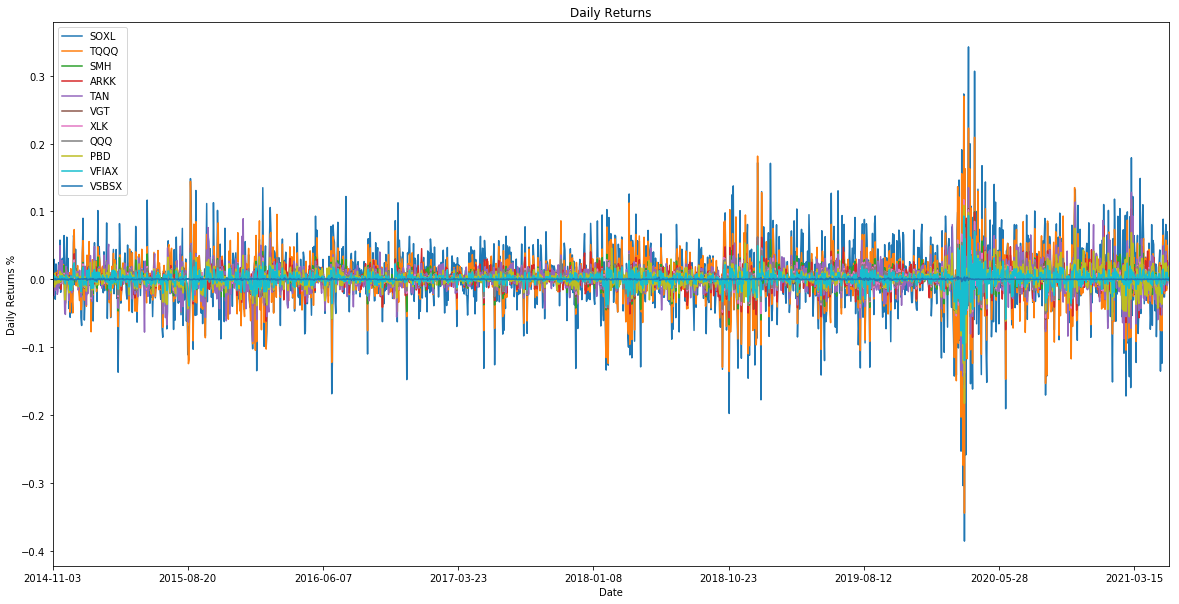

In [44]:
top_etf_rtn_plot = top_etf_rtn_df.plot(figsize=(20,10),title="Daily Returns")
top_etf_rtn_plot.set(ylabel='Daily Returns %')

In [45]:
# calculate cumulative returns
top_etf_cumrtn_df = (1 + top_etf_rtn_df).cumprod() - 1

[Text(0, 0.5, 'Cumulative Returns %')]

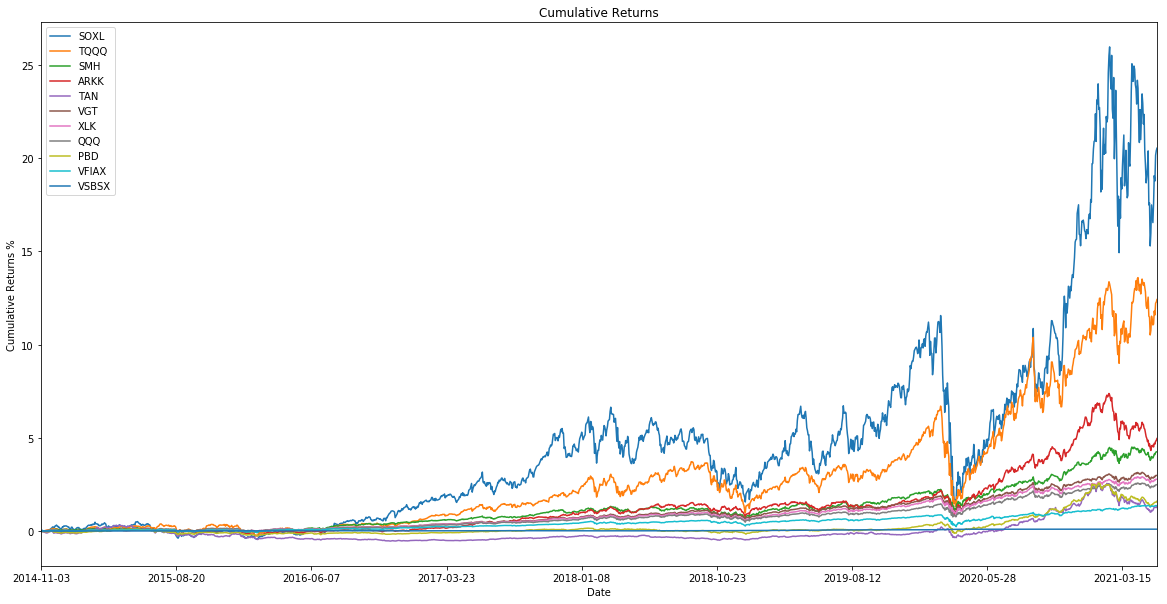

In [46]:
top_etf_cumrtn_plot = top_etf_cumrtn_df.plot(figsize=(20,10),title="Cumulative Returns")
top_etf_cumrtn_plot.set(ylabel='Cumulative Returns %')

[Text(0, 0.5, 'Standard Deviation')]

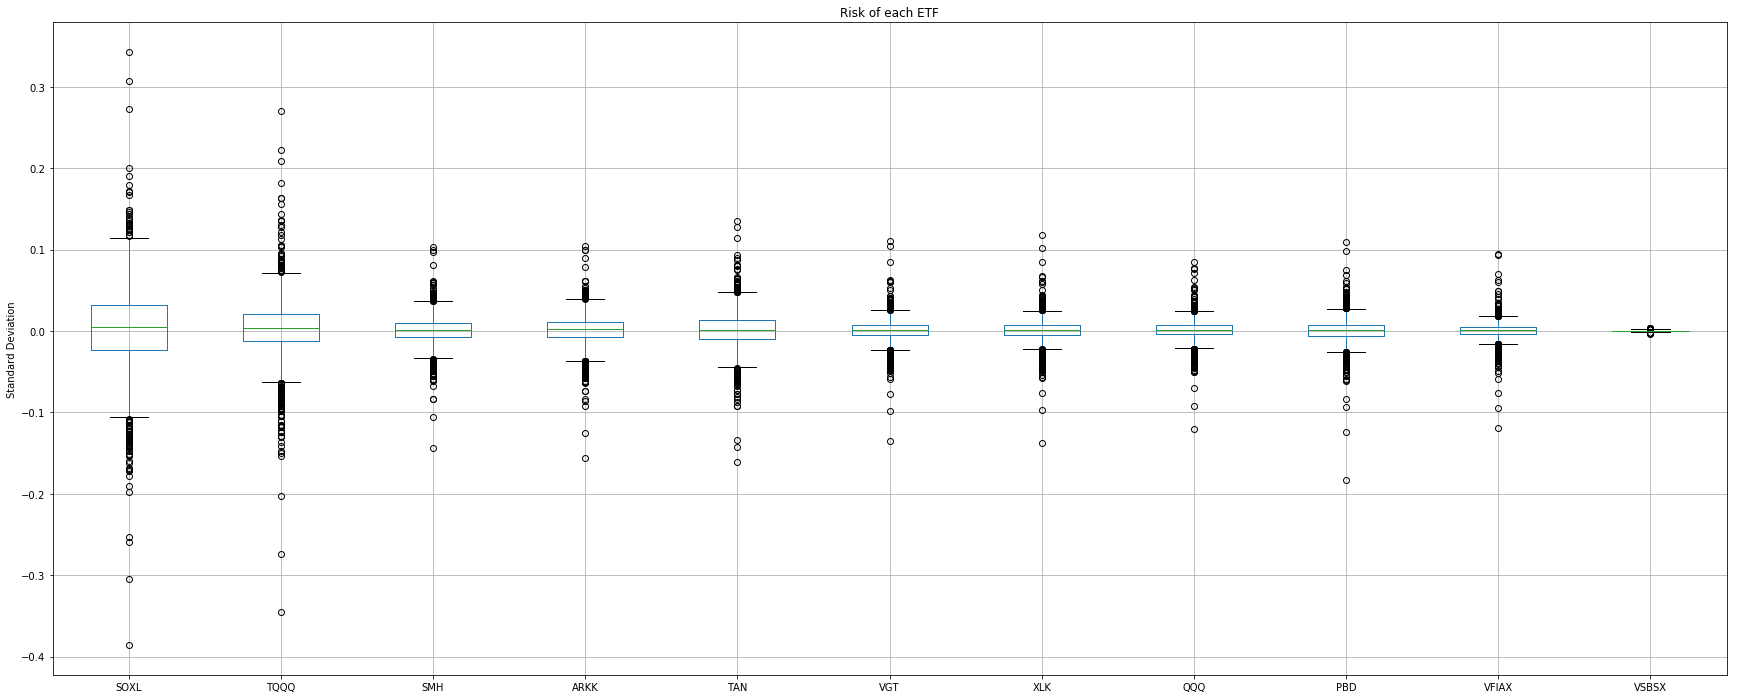

In [47]:
# Calculate and graph Standard Deviation for each ETF
top_etf_stddev_plot = top_etf_rtn_df.plot.box(figsize=(30,12), title='Risk of each ETF', grid=True)
top_etf_stddev_plot.set(ylabel='Standard Deviation')

In [48]:
# Calculate standard deviations
top_etf_daily_sd = top_etf_rtn_df.std()
top_etf_daily_sd

SOXL     0.053795
TQQQ     0.039511
SMH      0.017786
ARKK     0.019431
TAN      0.022896
VGT      0.014317
XLK      0.014288
QQQ      0.013395
PBD      0.015661
VFIAX    0.011525
VSBSX    0.000609
dtype: float64

In [49]:
# Calc Annualised Standard Deviation
trading_days = 252
top_etf_annualised_sd = top_etf_daily_sd * np.sqrt(trading_days)
top_etf_annualised_sd

SOXL     0.853967
TQQQ     0.627210
SMH      0.282336
ARKK     0.308454
TAN      0.363464
VGT      0.227273
XLK      0.226815
QQQ      0.212634
PBD      0.248606
VFIAX    0.182955
VSBSX    0.009674
dtype: float64

[Text(0, 0.5, 'Standard Deviation')]

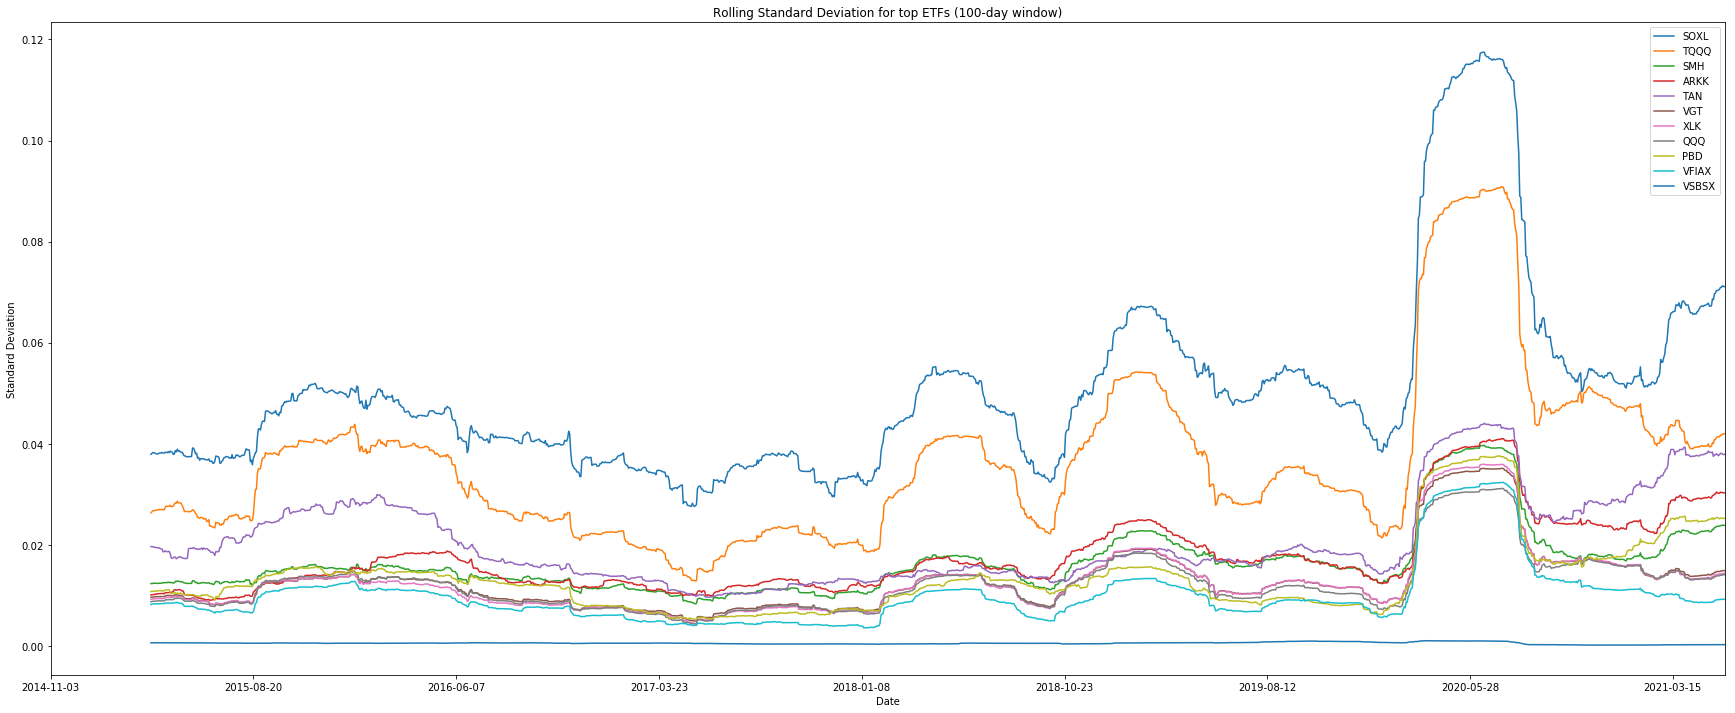

In [50]:
# Do rolling standard deviation, over 100 days
top_etf_rolling_sd = top_etf_rtn_df.rolling(window=100).std()
top_etf_roll_std_plot = top_etf_rolling_sd.plot(figsize=(30,12), title='Rolling Standard Deviation for top ETFs (100-day window)')
top_etf_roll_std_plot.set(ylabel='Standard Deviation')

In [51]:
# Review correlation between ETFs
top_etf_corr = top_etf_rtn_df.corr()
# Display the correlation matrix
top_etf_corr
#top_etf_corr.style.background_gradient(cmap='coolwarm').set_precision(4)

SOXL      TQQQ       SMH      ARKK       TAN       VGT       XLK  \
SOXL   1.000000  0.856168  0.988372  0.742727  0.625147  0.883272  0.870429   
TQQQ   0.856168  1.000000  0.858973  0.789322  0.612052  0.977835  0.976514   
SMH    0.988372  0.858973  1.000000  0.743621  0.626114  0.885252  0.874920   
ARKK   0.742727  0.789322  0.743621  1.000000  0.636309  0.788057  0.761915   
TAN    0.625147  0.612052  0.626114  0.636309  1.000000  0.624790  0.604570   
VGT    0.883272  0.977835  0.885252  0.788057  0.624790  1.000000  0.994812   
XLK    0.870429  0.976514  0.874920  0.761915  0.604570  0.994812  1.000000   
QQQ    0.853456  0.998578  0.858956  0.787662  0.612695  0.977058  0.976491   
PBD    0.697620  0.697048  0.708296  0.683531  0.802874  0.716917  0.703327   
VFIAX  0.813432  0.920705  0.815945  0.717261  0.619218  0.929112  0.933409   
VSBSX -0.294695 -0.319597 -0.294212 -0.220089 -0.201375 -0.330340 -0.328648   

            QQQ       PBD     VFIAX     VSBSX  
SOXL   0.853456  0.697620  0.813432 -0.294695  
TQQQ   0.998578  0.697048  0.920705 -0.319597  
SMH    0.858956  0.708296  0.815945 -0.294212  
ARKK   0.787662  0.683531  0.717261 -0.220089  
TAN    0.612695  0.802874  0.619218 -0.201375  
VGT    0.977058  0.716917  0.929112 -0.330340  
XLK    0.976491  0.703327  0.933409 -0.328648  
QQQ    1.000000  0.697161  0.922226 -0.325691  
PBD    0.697161  1.000000  0.740848 -0.208996  
VFIAX  0.922226  0.740848  1.000000 -0.363610  
VSBSX -0.325691 -0.208996 -0.363610  1.000000

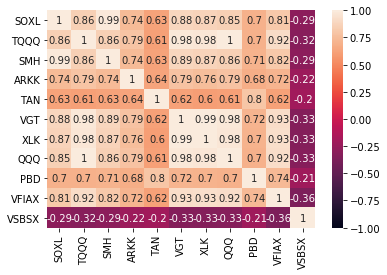

In [52]:
#plt.figure(figsize=(20, 10))
top_etf_corr_plot = sns.heatmap(top_etf_corr, vmin=-1, vmax=1, annot=True)  # -- vmin & vmax are optional
#plt.show()

In [53]:
# Analyse Sharpe Ratio
#sharpe ratio = (expected return of portfolio returns - risk-free rate) / standard deviation of portfolio returns

annual_sharpe_ratios = (top_etf_rtn_df.mean() - 0) / top_etf_annualised_sd  # -- assumption: risk-free rate is 0
print(annual_sharpe_ratios)

SOXL     0.003907
TQQQ     0.003779
SMH      0.004120
ARKK     0.004121
TAN      0.002121
VGT      0.004137
XLK      0.004000
QQQ      0.003983
PBD      0.002825
VFIAX    0.003212
VSBSX    0.006011
dtype: float64


[Text(0, 0.5, 'Sharpe Ratio')]

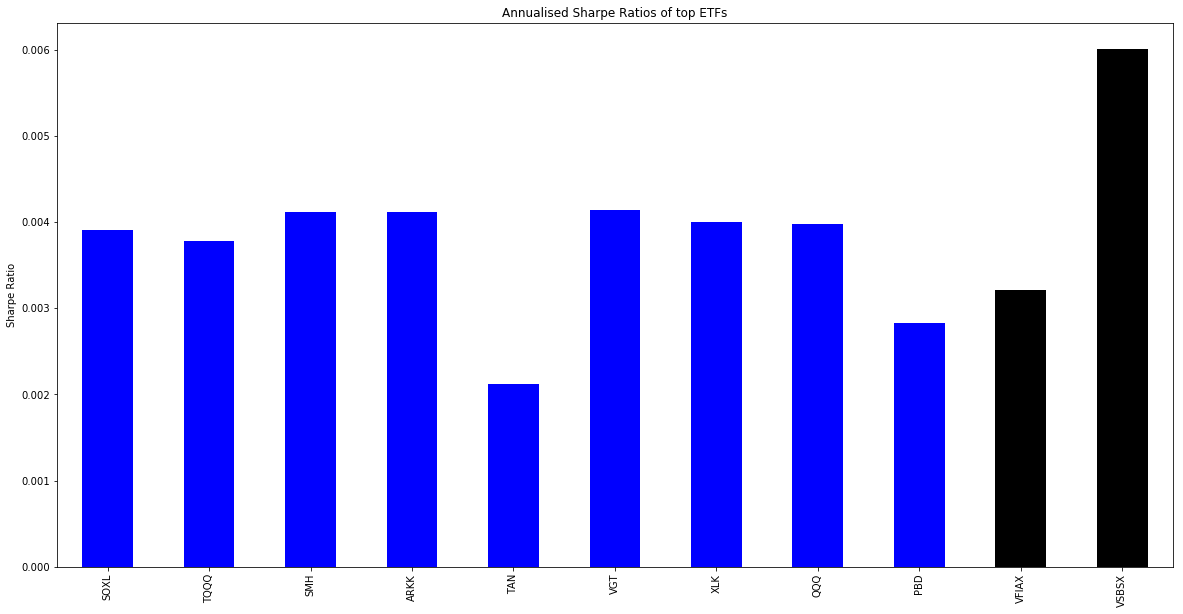

In [54]:
# Graph Sharpe Ratios
ann_sharpe_ratio_plot = annual_sharpe_ratios.plot.bar(figsize=(20,10), title='Annualised Sharpe Ratios of top ETFs', color=['blue','blue','blue','blue','blue','blue','blue','blue','blue','black','black'])  # -- or annualised_sharpe_ratios.plot(kind='bar'...etc.)
ann_sharpe_ratio_plot.set(ylabel='Sharpe Ratio')

In [55]:
# Bivariate plot (HvPlot) SOXL vs TQQQ
top_etf_close_df.hvplot.bivariate(x='SOXL', y='TQQQ', width=600, height=500)

:Bivariate   [SOXL,TQQQ]   (Density)

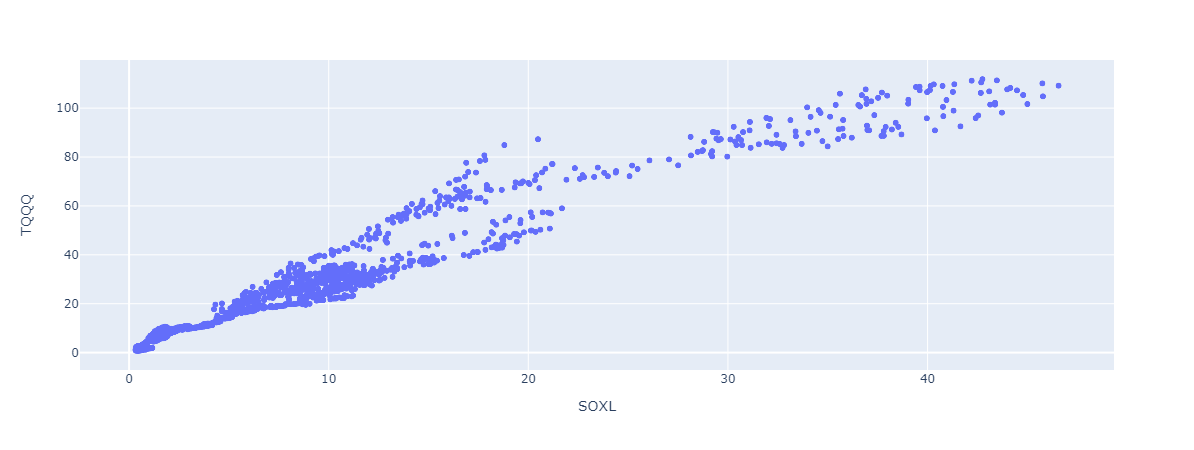

In [63]:
# Plotly scatter of SOXL vs TQQQ
fig = px.scatter(close_df, x="SOXL", y="TQQQ")
fig.show()

# Mapping Data and Sustainability

In [65]:
# Initial imports
import os
import requests
import pandas as pd
import ast
import hvplot.pandas
import plotly.express as px
import numpy as np
import yfinance as yf
from dotenv import load_dotenv
load_dotenv()

#import matplotlib.pyplot as plt
#%matplotlib inline

# Data used for countries and lat/long 
# https://developers.google.com/public-data/docs/canonical/countries_csv

# Data used to connect list of stock exchanges by country
# https://stockmarketmba.com/globalstockexchanges.php

True

In [66]:
#yfinance example (MSFT)
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show sustainability
sust = msft.sustainability

In [67]:
#ESG Score
sust.loc["totalEsg"].item()

14.63

In [68]:
#Example output of sustainability info
sust.head(5)

Value
2021-5                     
palmOil               False
controversialWeapons  False
gambling              False
socialScore            9.37
nuclear               False

In [69]:
#Rapid API - test MSFT data

rapid_api_key = os.getenv("X-RapidAPI-Key")

url = "https://esg-environmental-social-governance-data.p.rapidapi.com/search"

querystring = {"q":"MSFT"}

headers = {
    'x-rapidapi-key': rapid_api_key,
    'x-rapidapi-host': "esg-environmental-social-governance-data.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

[{"esg_id":4720,"company_name":"Microsoft Corporation","exchange_symbol":"NASDAQ","stock_symbol":"MSFT","environment_grade":"B","environment_level":"Medium","social_grade":"B","social_level":"Medium","governance_grade":"B","governance_level":"Medium","total_grade":"B","total_level":"Medium","disclaimer":"ESG Enterprise\u0027s ESG Rating data (\u0022Scores\u0022) are all based on public information and provided for informational purposes only. No member of ESG Enterprise or related parties make any prediction, warranty or representation whatsoever, expressly or impliedly, either as to the suitability of our Scores for any particular purposes or the validity of any derivative analysis or conclusion based on the Scores.","last_processing_date":"29-04-2021","environment_score":210,"social_score":202,"governance_score":210,"total":622}]


In [70]:
r2 = ast.literal_eval(response.text)
type(r2)

list

In [71]:
#Total ESG score
r2[0]['total']

622

In [72]:
#Set ticker list to be mapped
ticker = ["MSFT", "AAPL", "TSLA", "AEF", "SHOP", "AL", "FTE"]

In [73]:
ticker_df = pd.DataFrame(ticker)
ticker_df

0
0  MSFT
1  AAPL
2  TSLA
3   AEF
4  SHOP
5    AL
6   FTE

In [74]:
#Rapid API - pull in data for all tickers

url = "https://esg-environmental-social-governance-data.p.rapidapi.com/search"

headers = {
    'x-rapidapi-key': rapid_api_key,
    'x-rapidapi-host': "esg-environmental-social-governance-data.p.rapidapi.com"
    }

querystring = {"q":[ticker]}

ticker_request = (requests.request("GET", url, headers=headers, params=querystring)).text

esg_score = ast.literal_eval(ticker_request)
esg_score[0]['total']
print('')

In [75]:
#Set iteration loop for tickers
esg_data = []
exchange_data = []

for tickers in ticker:
    querystring = {"q":[tickers]}
    ticker_request = (requests.request("GET", url, headers=headers, params=querystring)).text
    esg_score = ast.literal_eval(ticker_request)[0]['total']
    exchange = ast.literal_eval(ticker_request)[0]['exchange_symbol']
    esg_data.append(esg_score)
    exchange_data.append(exchange)
    print(tickers, esg_score, exchange)

MSFT 622 NASDAQ
AAPL 751 NASDAQ
TSLA 705 NASDAQ
AEF 1301 ASX
SHOP 1072 OTCMKTS
AL 617 NYSE
FTE 805 BKK


In [76]:
ticker_df["ESG Score"] = esg_data
ticker_df["Exchange"] = exchange_data
ticker_df.columns = ["Company", "ESG Score", "Exchange"]
ticker_df.set_index("Company", inplace=True)
ticker_df

ESG Score Exchange
Company                    
MSFT           622   NASDAQ
AAPL           751   NASDAQ
TSLA           705   NASDAQ
AEF           1301      ASX
SHOP          1072  OTCMKTS
AL             617     NYSE
FTE            805      BKK

In [77]:
# Read the Mapbox API key
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [78]:
# Import country latitude and longitude - note need to change file path to resources folder in github
countries = pd.read_csv("Countries.csv")
del countries['country']
countries.rename(columns={'name': 'Country'}, inplace=True)
countries.rename(columns={'latitude': 'Latitude'}, inplace=True)
countries.rename(columns={'longitude': 'Longitude'}, inplace=True)
countries.set_index('Country', inplace=True)

countries.head(5)

Latitude  Longitude
Country                                   
Andorra               42.546245   1.601554
United Arab Emirates  23.424076  53.847818
Afghanistan           33.939110  67.709953
Antigua and Barbuda   17.060816 -61.796428
Anguilla              18.220554 -63.068615

In [79]:
# Test country loc - longitude
countries.loc['Anguilla'][1]

-63.068615

In [80]:
global_exchanges = pd.read_csv("Global_Stock_Exchanges.csv")
del global_exchanges['Bloomberg Exchange Code']
del global_exchanges['Bloomberg Composite Code']
del global_exchanges['Description']
del global_exchanges['ISO MIC']
del global_exchanges['EOD code']
del global_exchanges['# of Stocks']
global_exchanges.rename(columns={'Google Prefix': 'Exchange'}, inplace=True)
global_exchanges = global_exchanges.dropna()
global_exchanges.set_index('Country', inplace=True)

# Add columns into df for latitude and longitude
global_exchanges['Latitude'] = np.nan
global_exchanges['Longitude'] = np.nan

global_exchanges.head(5)

Exchange  Latitude  Longitude
Country                                
Australia      ASX       NaN        NaN
Austria        VIE       NaN        NaN
Belgium        EBR       NaN        NaN
Brazil        BVMF       NaN        NaN
Canada         TSE       NaN        NaN

In [81]:
for Country in global_exchanges.index:
    if Country in countries.index:
        lat = countries.loc[Country]['Latitude']
        lon = countries.loc[Country]['Longitude']
        global_exchanges.loc[Country, 'Latitude'] = lat
        global_exchanges.loc[Country, 'Longitude'] = lon
    else: 
        print(Country)

In [82]:
#Bring country into the dataframe
global_exchanges["Country"] = global_exchanges.index
global_exchanges.head(5)

Exchange   Latitude   Longitude    Country
Country                                             
Australia      ASX -25.274398  133.775136  Australia
Austria        VIE  47.516231   14.550072    Austria
Belgium        EBR  50.503887    4.469936    Belgium
Brazil        BVMF -14.235004  -51.925280     Brazil
Canada         TSE  56.130366 -106.346771     Canada

In [83]:
ticker_df2 = ticker_df.merge(global_exchanges.drop_duplicates(), how="inner", left_on="Exchange", right_on = "Exchange")
ticker_df2.index = ticker_df.index
ticker_df2.head(10)

ESG Score Exchange   Latitude   Longitude        Country
Company                                                          
MSFT           622   NASDAQ  37.090240  -95.712891  United States
AAPL           751   NASDAQ  37.090240  -95.712891  United States
TSLA           705   NASDAQ  37.090240  -95.712891  United States
AEF           1301      ASX -25.274398  133.775136      Australia
SHOP          1072  OTCMKTS  37.090240  -95.712891  United States
AL             617     NYSE  37.090240  -95.712891  United States
FTE            805      BKK  15.870032  100.992541       Thailand

In [84]:
# Possible groupby country then for average ESG Score than plot on the map
country_esg = ticker_df2.groupby("Country").mean()
country_esg["Country"] = country_esg.index
country_esg

ESG Score   Latitude   Longitude        Country
Country                                                       
Australia         1301.0 -25.274398  133.775136      Australia
Thailand           805.0  15.870032  100.992541       Thailand
United States      753.4  37.090240  -95.712891  United States

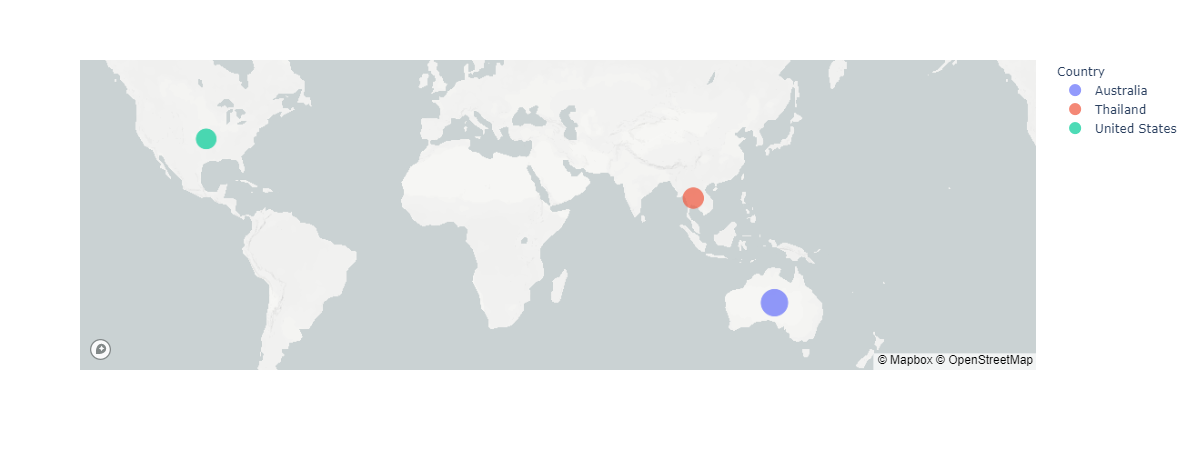

In [85]:
# What is the average sustainability score per country?
map_plot = px.scatter_mapbox(
    country_esg,
    lat="Latitude",
    lon="Longitude",
    size="ESG Score",
    color="Country",
    zoom=0.8
)

# Display the map
map_plot.show()

In [86]:
# What are the most sustainable companies?
esg_sorted = pd.DataFrame(ticker_df2["ESG Score"])
esg_sorted = esg_sorted.sort_values("ESG Score", ascending=False)
esg_sorted.hvplot.bar(color="green")

:Bars   [Company]   (ESG Score)